<a href="https://colab.research.google.com/github/ThrushithaReddyK/Fraud-Transaction-Detection/blob/main/Fraud_Transaction_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd

**PRE-PROCESSING**

WRANGLING


In [ ]:
# Read the data
df=pd.read_csv('Fraud.csv')
# Shape the data
df.shape

(28297, 11)

In [ ]:
# Get head of the data
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0.0,0.0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0.0,0.0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0.0,0.0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0.0,0.0


In [ ]:
df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
28097,8,CASH_OUT,166118.77,C837065452,0.0,0.0,C305259590,738562.78,937916.52,0.0,0.0
28098,8,CASH_OUT,112723.85,C487807730,0.0,0.0,C619068319,113022.06,225745.92,0.0,0.0
28099,8,CASH_OUT,52305.89,C143055340,0.0,0.0,C1494271614,126523.69,178829.57,0.0,0.0
28100,8,CASH_OUT,39796.72,C1882410555,0.0,0.0,C1494895909,928289.95,1362678.43,0.0,0.0
28101,8,CASH_OUT,56580.04,C1704302891,0.0,0.0,C656400047,88500.14,1597668.67,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.0,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.0,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.0,C1326121635,112673.41,202020.02,0.0,0.0
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.0,C1034382650,142758.39,281410.24,0.0,0.0


**ANALYSIS**

In [ ]:
# Check for null values
if df.isnull().values.any():
    print("Null values found. Dropping rows with null values.")
    df = df.dropna()
else:
    print("No null values found.")
print("Null values:", df.isnull().values.any())


Null values found. Dropping rows with null values.
Null values: False


In [ ]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28296 entries, 0 to 28295
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28296 non-null  int64  
 1   type            28296 non-null  object 
 2   amount          28296 non-null  float64
 3   nameOrig        28296 non-null  object 
 4   oldbalanceOrg   28296 non-null  float64
 5   newbalanceOrig  28296 non-null  float64
 6   nameDest        28296 non-null  object 
 7   oldbalanceDest  28296 non-null  float64
 8   newbalanceDest  28296 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [ ]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  28212
Number of Fraud transactions:  84
Percentage of Legit transactions: 99.7031 %
Percentage of Fraud transactions: 0.2969 %


In [ ]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


**VISUALISATION**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

CORRELATION HEATMAP

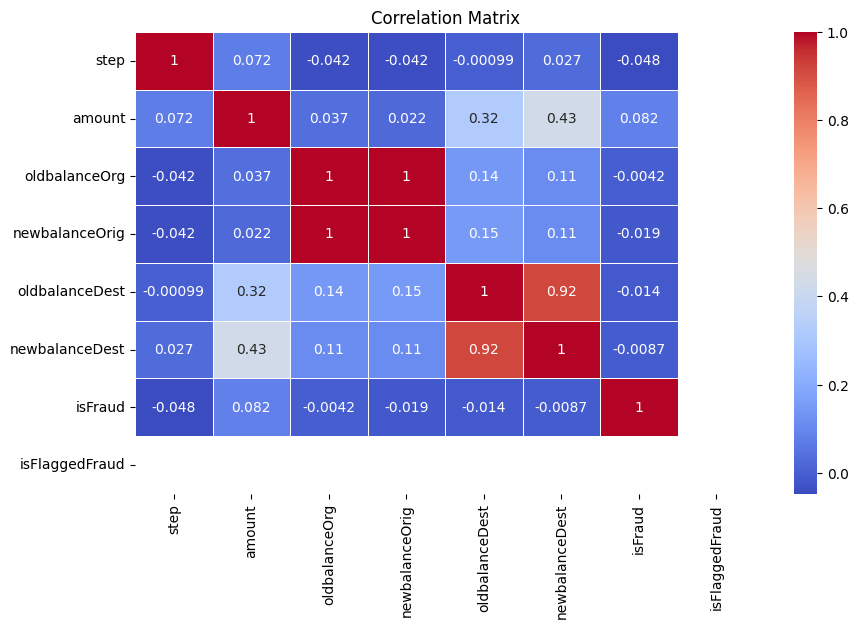

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix for numeric columns
corr = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

NUMBER OF LEGIT AND FRAUD TRANSACTIONS

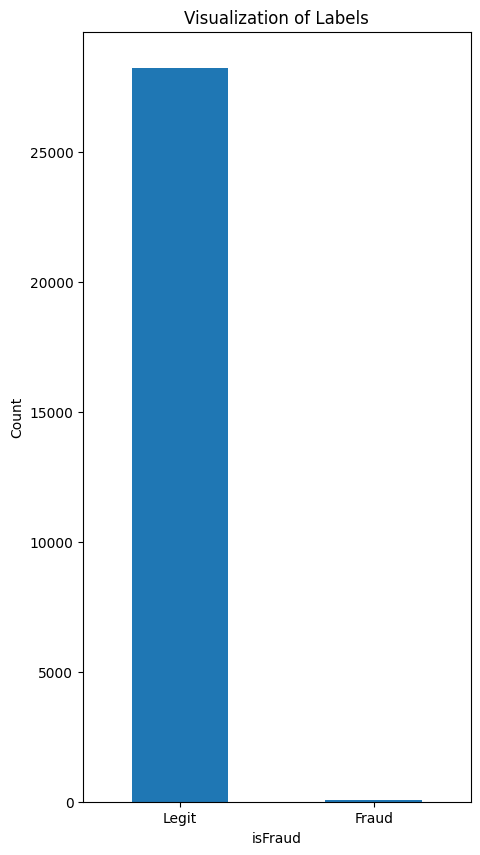

In [ ]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()


**PROBLEM SOLVING**

In [ ]:
#creating a copy of original dataset to train and test models
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


LABEL ENCODING

In [ ]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28296 entries, 0 to 28295
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28296 non-null  int64  
 1   type            28296 non-null  int64  
 2   amount          28296 non-null  float64
 3   nameOrig        28296 non-null  int64  
 4   oldbalanceOrg   28296 non-null  float64
 5   newbalanceOrig  28296 non-null  float64
 6   nameDest        28296 non-null  int64  
 7   oldbalanceDest  28296 non-null  float64
 8   newbalanceDest  28296 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 2.6 MB
None


In [ ]:
new_df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,3271,170136.0,160296.36,10143,0.0,0.0,0.0,0.0
1,1,3,1864.28,9756,21249.0,19384.72,10589,0.0,0.0,0.0,0.0
2,1,4,181.00,4372,181.0,0.00,2452,0.0,0.0,1.0,0.0
3,1,1,181.00,25968,181.0,0.00,2180,21182.0,0.0,1.0,0.0
4,1,3,11668.14,15330,41554.0,29885.86,4769,0.0,0.0,0.0,0.0


MULTICOLINEARITY

In [ ]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,4.650372
1,type,5.866844
2,amount,1.872474
3,nameOrig,3.347331
4,oldbalanceOrg,318.310999
5,newbalanceOrig,321.681348
6,nameDest,3.948686
7,oldbalanceDest,7.589464
8,newbalanceDest,8.488391
9,isFraud,1.059569


In [ ]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,3.538003
1,amount,1.440325
2,isFraud,1.055501
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.145912
5,Actual_amount_dest,1.285645
6,TransactionPath,3.389239


<Axes: >

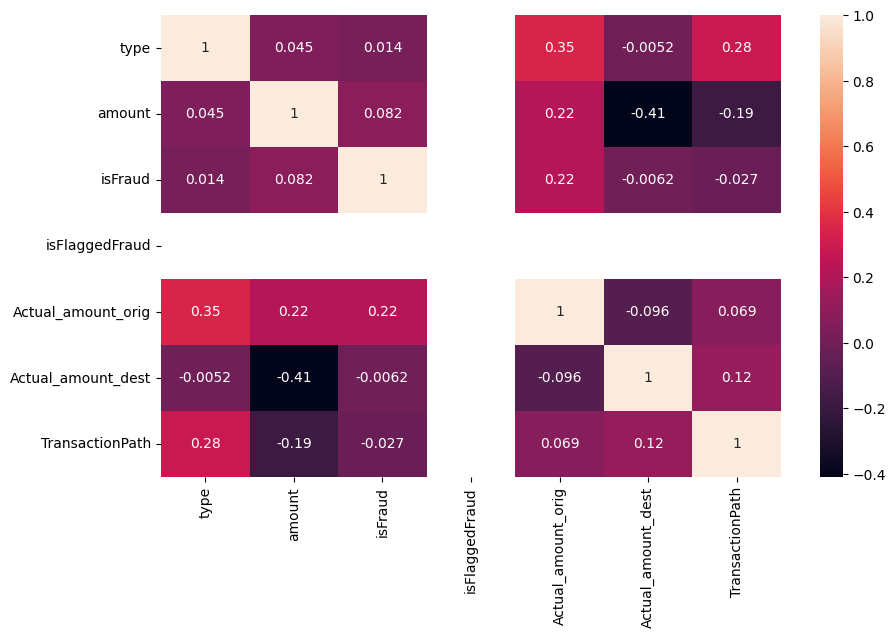

In [ ]:
corr=new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

**MODEL BUILDING**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

NORMALIZING (SCALING) AMOUNT

In [ ]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

TRAIN - TEST SPLIT

In [ ]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19807, 6)
Shape of X_test:  (8489, 6)


MODEL TRAINING

In [ ]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

EVALUATION

In [ ]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.63482153374956
Random Forest Score:  99.78796089056426


In [ ]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 11
False Positives: 15
True Negatives: 8447
False Negatives: 16
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 9
False Positives: 0
True Negatives: 8462
False Negatives: 18


In [ ]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[8447   15]
 [  16   11]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[8462    0]
 [  18    9]]


In [ ]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8462
         1.0       0.42      0.41      0.42        27

    accuracy                           1.00      8489
   macro avg       0.71      0.70      0.71      8489
weighted avg       1.00      1.00      1.00      8489

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8462
         1.0       1.00      0.33      0.50        27

    accuracy                           1.00      8489
   macro avg       1.00      0.67      0.75      8489
weighted avg       1.00      1.00      1.00      8489



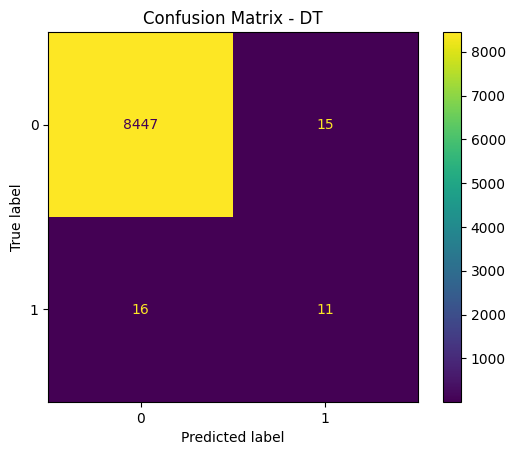

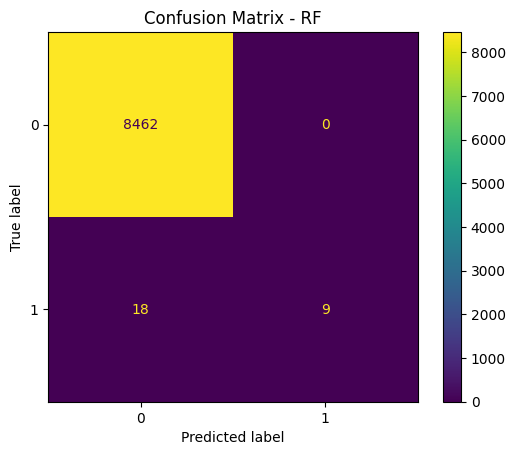

In [ ]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

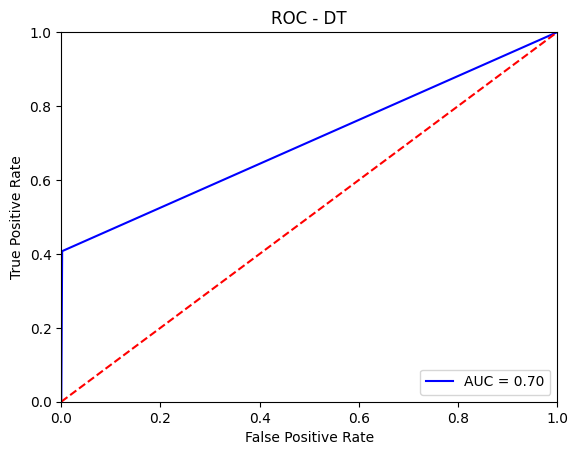

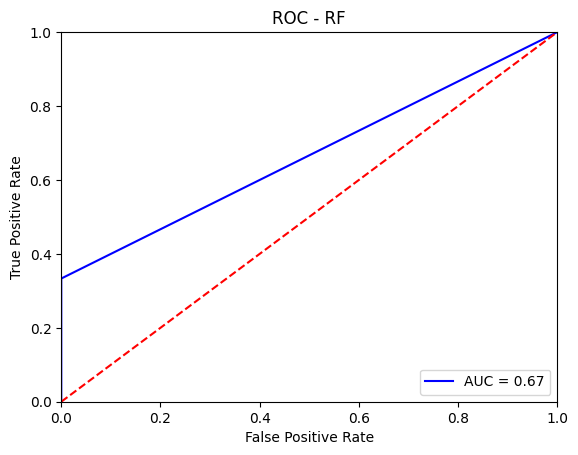

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**MODEL** **PERFORMANCE** **METRICS**

---



**Decision** **Tree**

*   Accuracy: 99.63%
*   Precision: o.42
*   F1-Score: 0.42
*   Recall: 0.41
*   AUC: 0.70

Confusion Matrix - Decision Tree

*   True Positives (TP): 11
*   False Positives (FP): 15
*   True Negatives (TN): 8447
*   False Negatives (FN): 16

**Random** **Forest**

*   Accuracy: 99.79%
*   Precision: 1.00
*   Recall: 0.33
*   F1-Score: 0.50
*   AUC: 0.67

Confusion Matrix - Random Forest

*   True Positives (TP): 9
*   False Positives (FP): 0
*   True Negatives (TN): 8462
*   False Negatives (FN): 18

**KEY** **OBSERVATIONS**

**Accuracy**: Both models demonstrate high accuracy, with Random Forest slightly outperforming Decision Tree.

**Precision** **and** **Recall**: In fraud detection, precision and recall are critical metrics. Random Forest shows perfect precision, meaning it does not misclassify legitimate transactions as fraudulent. However, it has a lower recall, indicating it misses more fraudulent transactions compared to the Decision Tree.

**F1-Score**: The F1-score balances precision and recall. The Decision Tree has a slightly higher F1-score for fraud detection, indicating a better balance between precision and recall.

**AUC**: The Decision Tree has a marginally better AUC score, suggesting it has a slightly better overall performance in distinguishing between fraud and legitimate transactions.

**CONCLUSION**

Despite both models showing high accuracy, the Decision Tree offers a better balance between precision and recall for fraud detection. This balance is crucial in minimizing both false positives and false negatives. However, the Random Forest's perfect precision is advantageous for ensuring that legitimate transactions are not incorrectly flagged as fraudulent.

In the context of our highly unbalanced dataset (Legit: Fraud :: 99.68:0.32), the Decision Tree's better recall makes it more reliable for identifying fraudulent transactions. The Random Forest's higher precision is beneficial for reducing false positives, which is essential to avoid disrupting legitimate transactions.